In [1]:
import pandas as pd

df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})

df

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm,grade_level,exam_score
0,bachelors,1,4,10,155,8,71
1,bachelors,2,3,10,151,8,72
2,bachelors,3,4,8,160,8,78
3,masters,3,3,8,160,8,79
4,masters,3,2,6,156,8,85
5,masters,4,3,6,150,8,86
6,masters,3,2,8,164,8,92
7,phd,4,2,8,151,8,93
8,phd,5,1,10,158,8,99
9,phd,5,1,10,152,8,100


In [36]:
X = df.drop(columns = ['exam_score'])
y = df['exam_score']

## **Variance threshold**

One of the most basic filter methods is to use a *variance threshold* to remove any features that have little to no variation in their values.
This is because features with low variance do not contribute much information to a model.

Since variance can only be calculated on numeric values, this method only *works on quantitative features*

In [37]:
X_num = X.drop(columns = ['edu_goal'])
X_num

,hours_study,hours_TV,hours_sleep,height_cm,grade_level
0,1,4,10,155,8
1,2,3,10,151,8
2,3,4,8,160,8
3,3,3,8,160,8
4,3,2,6,156,8
5,4,3,6,150,8
6,3,2,8,164,8
7,4,2,8,151,8
8,5,1,10,158,8
9,5,1,10,152,8


In [38]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.5)

print(selector.fit_transform(X_num))

[[  1   4  10 155]
 [  2   3  10 151]
 [  3   4   8 160]
 [  3   3   8 160]
 [  3   2   6 156]
 [  4   3   6 150]
 [  3   2   8 164]
 [  4   2   8 151]
 [  5   1  10 158]
 [  5   1  10 152]]


In [39]:
# Specify `indices=True` to get indices of selected features
print(selector.get_support(indices=True))

[0 1 2 3]


In [40]:
# Use indices to get the corresponding column names of selected features
num_cols = list(X_num.columns[selector.get_support(indices=True)])

X = X[['edu_goal'] + num_cols]

print(X)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm
0  bachelors            1         4           10        155
1  bachelors            2         3           10        151
2  bachelors            3         4            8        160
3    masters            3         3            8        160
4    masters            3         2            6        156
5    masters            4         3            6        150
6    masters            3         2            8        164
7        phd            4         2            8        151
8        phd            5         1           10        158
9        phd            5         1           10        152


## **Pearson’s correlation**

### Correlation between features

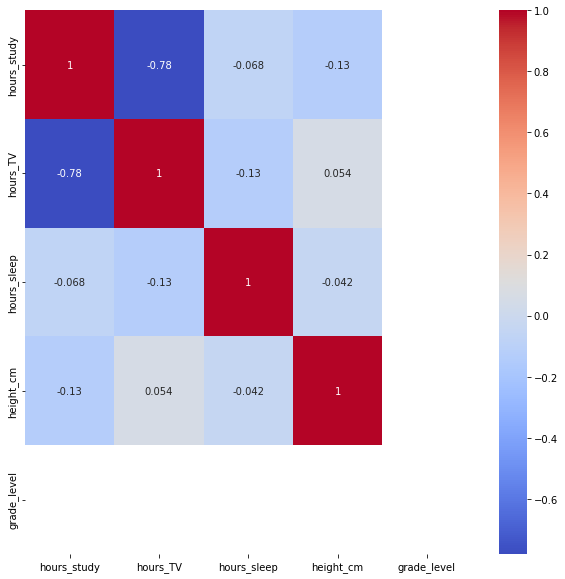

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_num.corr(method = 'pearson') #'pearson' is default

plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

plt.show()

In [42]:
corr_matrix

,hours_study,hours_TV,hours_sleep,height_cm,grade_level
hours_study,1.000000,-0.780763,-0.067522,-0.133004,NaN
hours_TV,-0.780763,1.000000,-0.130410,0.054270,NaN
hours_sleep,-0.067522,-0.130410,1.000000,-0.041615,NaN
height_cm,-0.133004,0.054270,-0.041615,1.000000,NaN
grade_level,NaN,NaN,NaN,NaN,NaN


In [43]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

hours_TV hours_study -0.780763315142435


### Correlation between feature and target

In [44]:
X_y = X_num.copy()
X_y['exam_score'] = y

print(X_y)

   hours_study  hours_TV  hours_sleep  height_cm  grade_level  exam_score
0            1         4           10        155            8          71
1            2         3           10        151            8          72
2            3         4            8        160            8          78
3            3         3            8        160            8          79
4            3         2            6        156            8          85
5            4         3            6        150            8          86
6            3         2            8        164            8          92
7            4         2            8        151            8          93
8            5         1           10        158            8          99
9            5         1           10        152            8         100


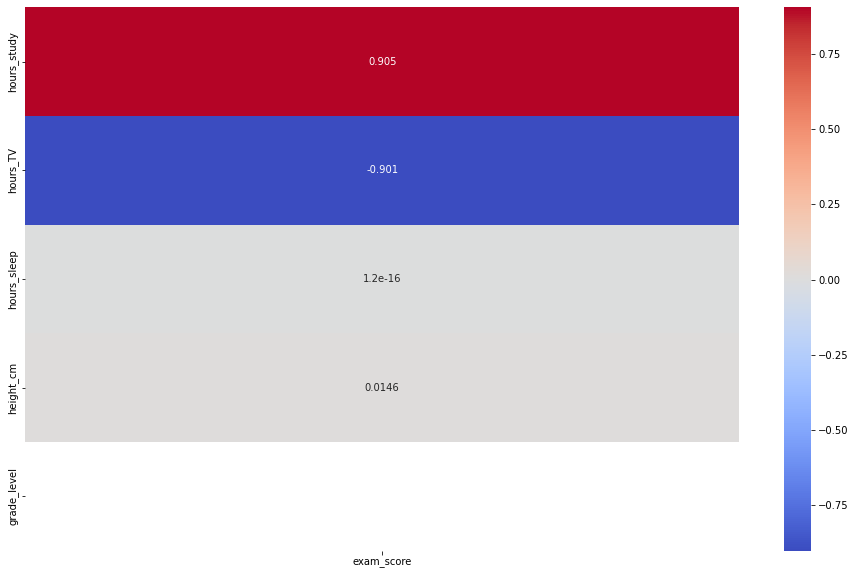

In [45]:
corr_matrix = X_y.corr()

# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['exam_score']].drop(labels = ['exam_score'])

plt.figure(figsize = (16, 10))
sns.heatmap(corr_target, annot = True, fmt = '.3', cmap = 'coolwarm')

plt.show()


In [46]:
X = X.drop(columns=['hours_TV'])

X

,edu_goal,hours_study,hours_sleep,height_cm
0,bachelors,1,10,155
1,bachelors,2,10,151
2,bachelors,3,8,160
3,masters,3,8,160
4,masters,3,6,156
5,masters,4,6,150
6,masters,3,8,164
7,phd,4,8,151
8,phd,5,10,158
9,phd,5,10,152


In [49]:
from sklearn.feature_selection import f_regression

f_regression(X_num, y)


(array([3.61362007e+01, 3.44537037e+01, 0.00000000e+00, 1.70259066e-03,
        0.00000000e+00]),
 array([3.19334945e-04, 3.74322763e-04, 1.00000000e+00, 9.68097878e-01,
        1.00000000e+00]))

In [50]:
X_num.columns

Index(['hours_study', 'hours_TV', 'hours_sleep', 'height_cm', 'grade_level'], dtype='object')

## **Mutual information**

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_enc = X.copy()

X_enc['edu_goal'] = le.fit_transform(X['edu_goal'])

X_enc

,edu_goal,hours_study,hours_sleep,height_cm
0,0,1,10,155
1,0,2,10,151
2,0,3,8,160
3,1,3,8,160
4,1,3,6,156
5,1,4,6,150
6,1,3,8,164
7,2,4,8,151
8,2,5,10,158
9,2,5,10,152


In [56]:
from sklearn.feature_selection import mutual_info_regression

print(mutual_info_regression(X_enc, y, random_state = 42, discrete_features = [0])) #the values of edu_goal are still discrete and should be interpreted as such

[0.65563492 0.33063492 0.         0.        ]


In [58]:
# pick out the top k features with the highest ranked scores.
from sklearn.feature_selection import SelectKBest
from functools import partial

score_func = partial(mutual_info_regression, discrete_features = [0], random_state = 42)

selection = SelectKBest(score_func = score_func, k = 3)

print(selection.fit_transform(X_enc, y))

[[  0   1 155]
 [  0   2 151]
 [  0   3 160]
 [  1   3 160]
 [  1   3 156]
 [  1   4 150]
 [  1   3 164]
 [  2   4 151]
 [  2   5 158]
 [  2   5 152]]


In [59]:
X = X[X.columns[selection.get_support(indices=True)]]

print(X)


    edu_goal  hours_study  height_cm
0  bachelors            1        155
1  bachelors            2        151
2  bachelors            3        160
3    masters            3        160
4    masters            3        156
5    masters            4        150
6    masters            3        164
7        phd            4        151
8        phd            5        158
9        phd            5        152


In [63]:
mi_scores = mutual_info_regression(X_enc, y, random_state=42)

mi_df = pd.DataFrame({
    'features': X_enc.columns,
    'Mutual information': mi_scores
})
mi_df = mi_df.sort_values('Mutual information', ascending = False)

mi_df

,features,Mutual information
0,edu_goal,0.375635
1,hours_study,0.292302
2,hours_sleep,0.058968
3,height_cm,0.000000


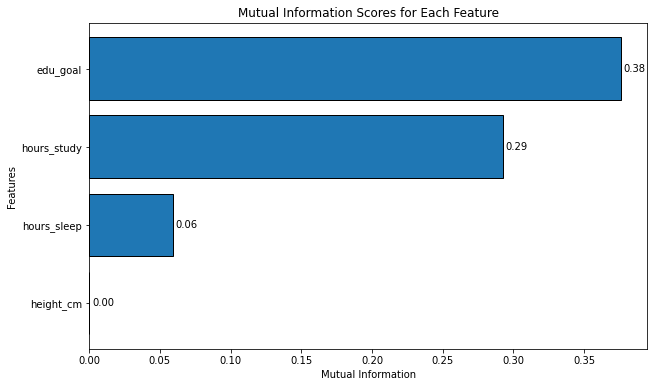

In [80]:
# Visualize
plt.figure(figsize=(10, 6))
plt.barh(mi_df['features'], mi_df['Mutual information'], edgecolor = 'black')    

for index, value in enumerate(mi_df['Mutual information']):
    plt.text(value + 0.002, index, f'{value:.2f}', va='center')
    
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title('Mutual Information Scores for Each Feature')
plt.gca().invert_yaxis()  # Đảo ngược trục y để giá trị cao nhất ở trên cùng
    
plt.show()

In [83]:
import numpy as np
data1 = np.ones((4, 1))

print(data1)

[[1.]
 [1.]
 [1.]
 [1.]]


In [84]:
import numpy as np
data1 = np.ones((4, ))

print(data1)

[1. 1. 1. 1.]
